In [ ]:
# Setup the notebook
import seaborn as sns
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [15, 10]})
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
pd.set_option('display.float_format', lambda x: '%.5f' % x)
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 8]})

In [ ]:
# import dataset
vgsales_df = pd.read_csv('/content/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [ ]:
vgsales_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.00000,Sports,Nintendo,41.36000,28.96000,3.77000,8.45000,82.53000,76.00000,51.00000,8,322.00000,Nintendo,E
1,Super Mario Bros.,NES,1985.00000,Platform,Nintendo,29.08000,3.58000,6.81000,0.77000,40.24000,nan,nan,NaN,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008.00000,Racing,Nintendo,15.68000,12.76000,3.79000,3.29000,35.52000,82.00000,73.00000,8.3,709.00000,Nintendo,E
3,Wii Sports Resort,Wii,2009.00000,Sports,Nintendo,15.61000,10.93000,3.28000,2.95000,32.77000,80.00000,73.00000,8,192.00000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.00000,Role-Playing,Nintendo,11.27000,8.89000,10.22000,1.00000,31.37000,nan,nan,NaN,nan,NaN,NaN


In [ ]:
# total number of nan per columns
vgsales_df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [ ]:
vgsales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [ ]:
vgsales_df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [ ]:
# import the required library
import missingno as msno

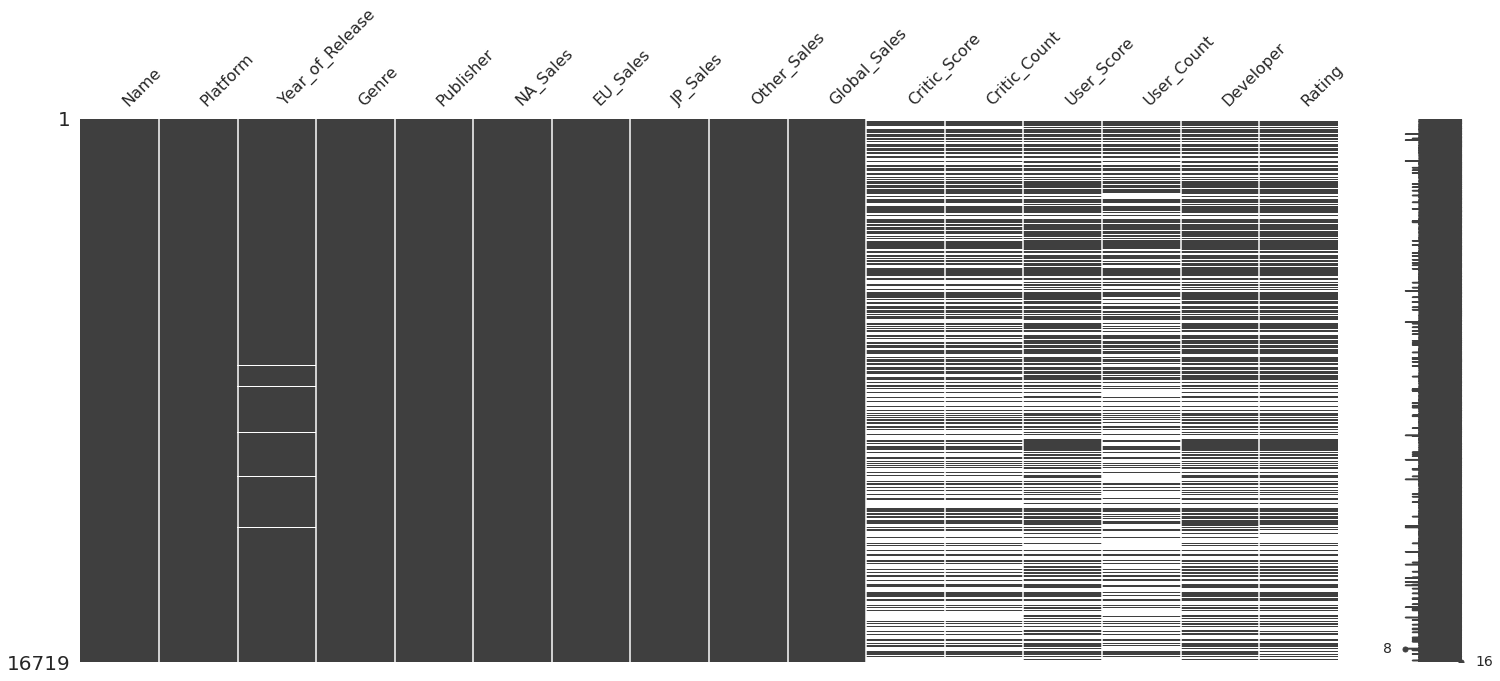

In [ ]:
# visulize missing value as matrix
msno.matrix(vgsales_df);

In [ ]:
# perc_threshold portion of nan/notNan or more of its data as null\nan values
# function to filter columns based on nan threshold
def filter_columns(df , perc_threshold):
    # count nan per column
    nan_val = df.isna().sum()
    keep_col = []
    # traverse each column
    for i in nan_val.keys():
        #check portion of nan in each column
        if nan_val[i] / df.shape[0] < perc_threshold:
            # append only columns passes threshold
            keep_col.append(i)
    # return df with filtered column
    return df[keep_col]

In [ ]:
# remove columns that have 20% or more of its data as missing values
filter_columns(vgsales_df, 0.2).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


###EDA

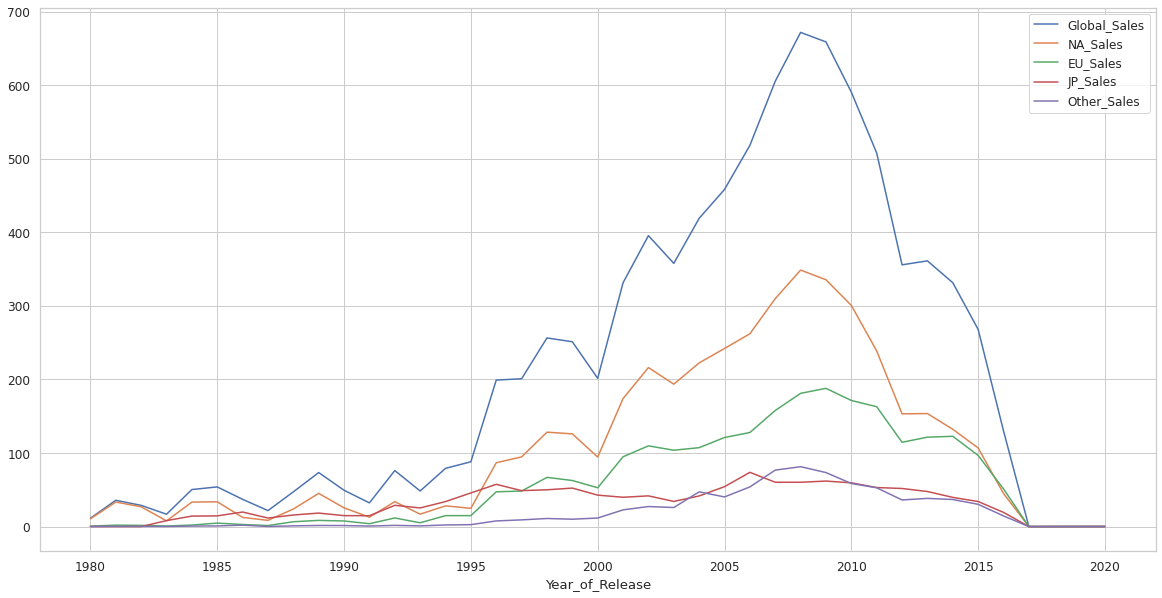

In [ ]:
GSales_Year = vgsales_df.groupby('Year_of_Release')[['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
GSales_Year.plot(figsize = (20,10));

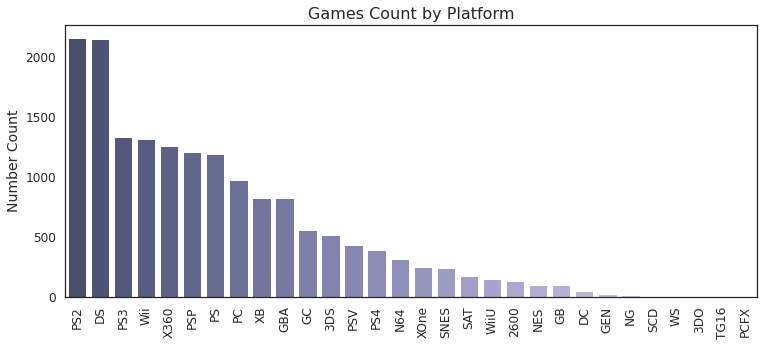

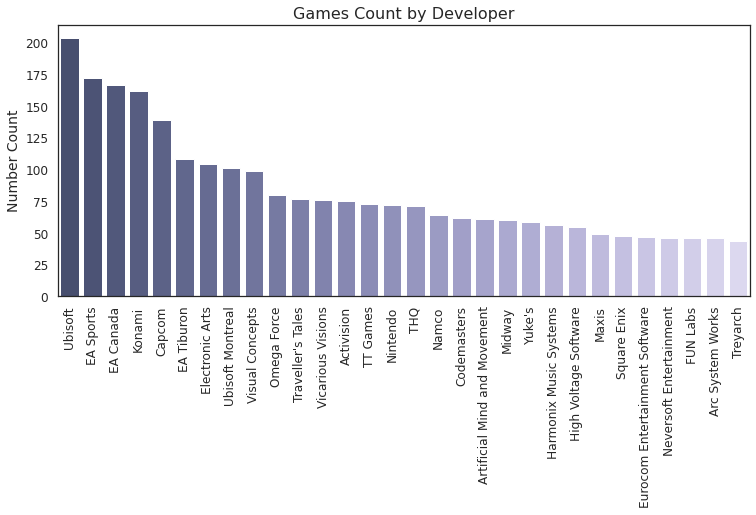

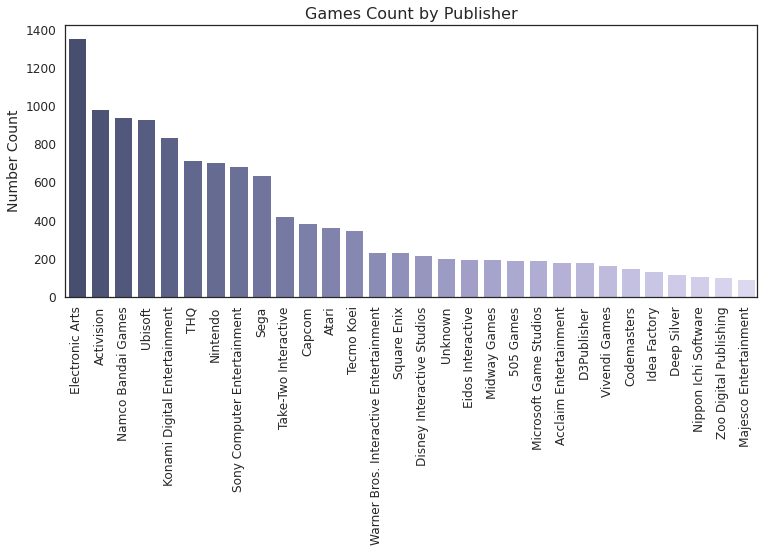

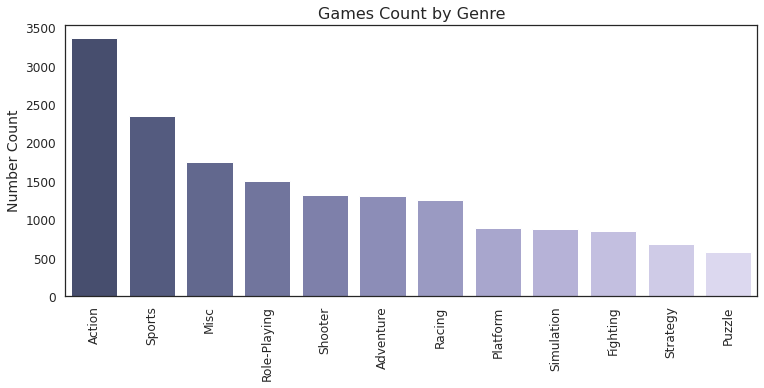

In [ ]:
cols = ['Platform', 'Developer', 'Publisher', 'Genre']

for col in cols:
    chart = vgsales_df[['Name', col]].groupby([col]).count().sort_values('Name', ascending=False).reset_index()
    sns.set_style("white")
    plt.figure(figsize=(12.4, 5))
    plt.xticks(rotation=90)
    sns.barplot(x=col, y='Name', data=chart[:30],
                palette=sns.cubehelix_palette((12 if col == 'Genre' else 30), start=2.8, rot= 0.1,
                                              dark=0.3, light=.85, reverse=True)).set_title(('Games Count by '+col), fontsize=16)
    plt.ylabel('Number Count', fontsize=14)
    plt.xlabel('')

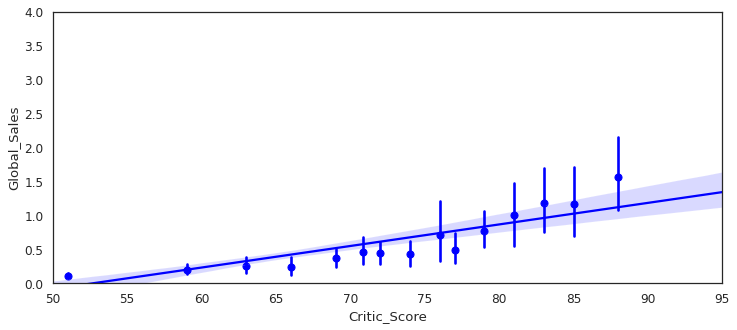

In [ ]:
crit_score_perform = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x="Critic_Score", y="Global_Sales", data=vgsales_df.loc[vgsales_df.Year_of_Release >= 2014],
            truncate=True, x_bins=15, color="blue").set(ylim=(0, 4), xlim=(50, 95));

###Sales with over 1 million

In [ ]:
# Create a new dataframe with new colunm added called Hit
v2_df = vgsales_df[['Name','Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
v2_df = v2_df.dropna().reset_index(drop=True)
hit_df = v2_df[['Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
hit_df['Hit'] = hit_df['Global_Sales']
hit_df.drop('Global_Sales', axis=1, inplace=True)
pd.options.display.float_format = "{:,.2f}".format

In [ ]:
hit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7982 entries, 0 to 7981
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         7982 non-null   object 
 1   Genre            7982 non-null   object 
 2   Publisher        7982 non-null   object 
 3   Year_of_Release  7982 non-null   float64
 4   Critic_Score     7982 non-null   float64
 5   Hit              7982 non-null   float64
dtypes: float64(3), object(3)
memory usage: 374.3+ KB


In [ ]:
hit_df.head()

,Platform,Genre,Publisher,Year_of_Release,Critic_Score,Hit
0,Wii,Sports,Nintendo,"2,006.00",76.00,82.53
1,Wii,Racing,Nintendo,"2,008.00",82.00,35.52
2,Wii,Sports,Nintendo,"2,009.00",80.00,32.77
3,DS,Platform,Nintendo,"2,006.00",89.00,29.80
4,Wii,Misc,Nintendo,"2,006.00",58.00,28.92


In [ ]:
# to see if the sales hit 1 million or not
def hit(sales):
    if sales >= 1:
        return 1
    else:
        return 0

hit_df['Hit'] = hit_df['Hit'].apply(lambda x: hit(x))

In [ ]:
hit_df.head()

,Platform,Genre,Publisher,Year_of_Release,Critic_Score,Hit
0,Wii,Sports,Nintendo,"2,006.00",76.00,1
1,Wii,Racing,Nintendo,"2,008.00",82.00,1
2,Wii,Sports,Nintendo,"2,009.00",80.00,1
3,DS,Platform,Nintendo,"2,006.00",89.00,1
4,Wii,Misc,Nintendo,"2,006.00",58.00,1


In [ ]:
# import get_dummies class and convert categorical data into dummy
from pandas import get_dummies
dum_df = pd.get_dummies(hit_df)

In [ ]:
dum_df.head()

,Year_of_Release,Critic_Score,Hit,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_10TACLE Studios,Publisher_1C Company,Publisher_2D Boy,Publisher_3DO,Publisher_505 Games,Publisher_5pb,Publisher_AQ Interactive,Publisher_ASCII Entertainment,...,Publisher_Telegames,Publisher_Telltale Games,Publisher_Tetris Online,Publisher_The Adventure Company,Publisher_Titus,Publisher_Tomy Corporation,Publisher_Touchstone,Publisher_Trion Worlds,Publisher_Tripwire Interactive,Publisher_Tru Blu Entertainment,Publisher_UFO Interactive,Publisher_Ubisoft,Publisher_Ubisoft Annecy,Publisher_Universal Interactive,Publisher_Unknown,Publisher_Valcon Games,Publisher_Valve,Publisher_Valve Software,Publisher_Vatical Entertainment,Publisher_Victor Interactive,Publisher_Vir2L Studios,Publisher_Virgin Interactive,Publisher_Visco,Publisher_Vivendi Games,Publisher_Wanadoo,Publisher_Wargaming.net,Publisher_Warner Bros. Interactive Entertainment,Publisher_White Park Bay Software,Publisher_XS Games,Publisher_Xicat Interactive,Publisher_Xplosiv,Publisher_Xseed Games,Publisher_Yacht Club Games,Publisher_Yuke's,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_id Software,Publisher_inXile Entertainment
0,"2,006.00",76.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"2,008.00",82.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"2,009.00",80.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"2,006.00",89.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"2,006.00",58.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Normalize the feature matrix using Standard Scaler and partition the data into training and testing variables

In [ ]:
# Separeate the variables into feature matrix (X) and target variable (y)
X = dum_df.drop(columns=['Hit'],axis=1)
y = dum_df['Hit'].values

In [ ]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [ ]:
# splitting the data into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Build a grid search
from sklearn.model_selection import GridSearchCV

### *Decision Trees (DT)*

In [ ]:
# import decision tree class
from sklearn.tree import DecisionTreeClassifier

# fit desicion tree model
dt_model = DecisionTreeClassifier()

# fit the DT model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# # predict using the dt model
y_pred = dt_model.predict(X_test)

In [ ]:
# prediction on X_test, y_train and compare the values
tree_predicted_test = dt_model.predict(X_test)
tree_predicted_train = dt_model.predict(X_train)

In [ ]:
# print and compare the score
print("The training accuracy score is: ", metrics.accuracy_score(tree_predicted_train, y_train))
print("The testing accuracy score is: ", metrics.accuracy_score(tree_predicted_test, y_test))

The training accuracy score is:  0.9971362090567388
The testing accuracy score is:  0.8196242171189979


In [ ]:
# check if DT is over fit or not
metrics.accuracy_score(y_test, y_pred)

0.8196242171189979

In [ ]:
# create the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1776,  217],
       [ 215,  187]])

In [ ]:
# specify what to search on
param_dist_grid = {
    'min_samples_leaf' : range(2,12,2),
    'max_depth': range(2,30,2),
    'criterion':['gini', 'entropy']
}
param_dist_grid

{'criterion': ['gini', 'entropy'],
 'max_depth': range(2, 30, 2),
 'min_samples_leaf': range(2, 12, 2)}

In [ ]:
# standard estimator
clf_tree = DecisionTreeClassifier()

In [ ]:
clf = GridSearchCV(clf_tree, param_dist_grid)

In [ ]:
# fit X_train and y_train
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 30, 2),
                         'min_samples_leaf': range(2, 12, 2)})

In [ ]:
# print the tuned parameters and score
print("Tuned Decision Tree parameters: ", clf.best_params_)
print("Tuned Decision Tree Best Score is: ", clf.best_score_)

Tuned Decision Tree parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 8}
Tuned Decision Tree Best Score is:  0.8528743455748931


In [ ]:
# call best estimator to find optimal params
dt_model_best = clf.best_estimator_

In [ ]:
# predict X_test with the best estimator params
y_pred_best = dt_model_best.predict(X_test)

In [ ]:
# plot report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1993
           1       0.45      0.46      0.45       402

    accuracy                           0.81      2395
   macro avg       0.67      0.67      0.67      2395
weighted avg       0.82      0.81      0.81      2395



In [ ]:
# print classification report with best
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1993
           1       0.66      0.33      0.44       402

    accuracy                           0.86      2395
   macro avg       0.77      0.65      0.68      2395
weighted avg       0.84      0.86      0.84      2395



In [ ]:
# predict the best model on X_test, y_train and compare the values
tree_predicted_test = dt_model_best.predict(X_test)
tree_predicted_train = dt_model_best.predict(X_train)

In [ ]:
# show the optimal scores
print("The training accuracy score is: ", metrics.accuracy_score(tree_predicted_train, y_train))
print("The testing accuracy score is: ", metrics.accuracy_score(tree_predicted_test, y_test))

The training accuracy score is:  0.8695185251476643
The testing accuracy score is:  0.8588726513569938


### *Logistic Regression (LR)*

In [ ]:
# call LogisticRegression class
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,0.01,1,3,5,10,25,50]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_best = grid_clf_acc.predict(X_test)

In [ ]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(grid_clf_acc.best_params_))
print("Best score is {}".format(grid_clf_acc.best_score_))

Tuned Logistic Regression Parameters: {'C': 25, 'penalty': 'l2'}
Best score is 0.3978723404255319


In [ ]:
# print the best model
lr_model_best = grid_clf_acc.best_estimator_
print(lr_model_best)

LogisticRegression(C=25)


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1993
           1       0.45      0.46      0.45       402

    accuracy                           0.81      2395
   macro avg       0.67      0.67      0.67      2395
weighted avg       0.82      0.81      0.81      2395



In [ ]:

#after grid search
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1993
           1       0.63      0.40      0.49       402

    accuracy                           0.86      2395
   macro avg       0.76      0.68      0.70      2395
weighted avg       0.84      0.86      0.85      2395



In [ ]:
def classification_model_evaluation(X,y,score):
    # scoring optioon: accuracy, f1_macro, precision_macro, recall_macro
    from sklearn.preprocessing import LabelBinarizer
    from sklearn.metrics import roc_curve,roc_auc_score,auc


    # import models
    import pandas
    import matplotlib.pyplot as plt
    from sklearn import model_selection
    from sklearn.linear_model import LogisticRegression
    from sklearn.neural_network import MLPClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3)

    # load models
    seed = 1
    models = []
    models.append(('LR', LogisticRegression(C=100)))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('NN', MLPClassifier()))
    models.append(('NB', GaussianNB()))
    #models.append(('SVM', SVC()))
    #models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('RF',RandomForestClassifier()))

    results = []
    names = []
    models_summary = {}
    scoring = score
    # Define a result table as a DataFrame
    result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        #print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))
        models_summary[name] = ([cv_results.mean(),cv_results.std()])


        cls = model.fit(X_train,y_train)
        yproba = cls.predict_proba(X_test)[::,1]
        fpr, tpr, _ = roc_curve(y_test,  yproba)
        auc = roc_auc_score(y_test, yproba)

        result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                            'fpr':fpr,
                                            'tpr':tpr,
                                            'auc':auc}, ignore_index=True)

    models_summary_df = pd.DataFrame(models_summary,index=[str(score) + '_mean', str(score) + '_stdev'])

    #  model comparison boxplot
    fig = plt.figure(figsize=(10,6))
    fig.suptitle('Model Comparison \n Scoring: %s' %scoring)
    ax = fig.add_subplot(111)
    boxplot_results = pd.DataFrame(results, index=names)
    boxplot_results.assign(m=boxplot_results.mean(axis=1)).sort_values('m').drop('m', axis=1)

    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.grid()
    plt.show()
    #print(results)


    # Set name of the classifiers as index labels
    result_table.set_index('classifiers', inplace=True)

    fig = plt.figure(figsize=(10,6))

    for i in result_table.index:
        plt.plot(result_table.loc[i]['fpr'],
                 result_table.loc[i]['tpr'],
                 label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

    plt.plot([0,1], [0,1], color='orange', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("Flase Positive Rate", fontsize=15)

    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)

    plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend(prop={'size':13}, loc='lower right')
    plt.grid()
    plt.show()

    display(models_summary_df.head(2))

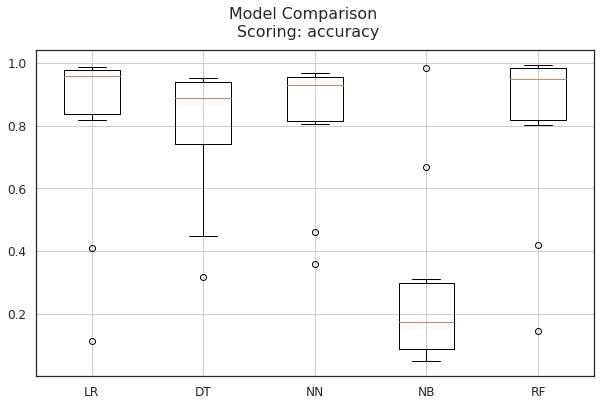

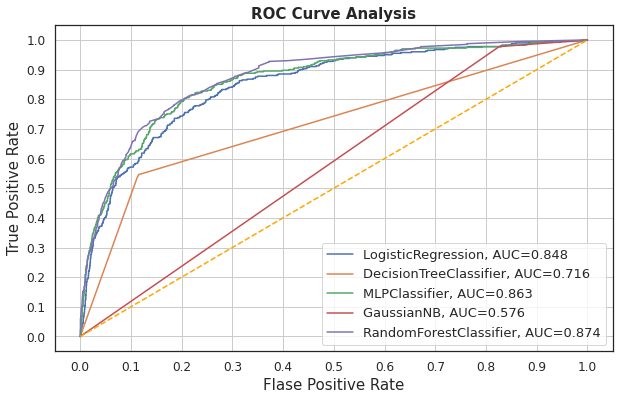

,LR,DT,NN,NB,RF
accuracy_mean,0.81,0.78,0.82,0.29,0.81
accuracy_stdev,0.29,0.21,0.21,0.29,0.28


In [ ]:
classification_model_evaluation(X,y,'accuracy')